<h1>Step 2: Preprocessing & EDA</h1>

---

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Đọc dữ liệu từ file

In [40]:
data = pd.read_csv('weatherHCM.csv', sep='\t')
data.head(10)

,Date,Time,Weather,Temp,Feels,Wind,Gust,Rain,Humidity,Cloud,Pressure,Vis
0,"Thu 01, Jan 2009",00:00,Fog,23 °c,25 °c,9 km/h from NNW,15 km/h,0.0 mm,97%,100%,1010 mb,Poor
1,"Thu 01, Jan 2009",03:00,Light drizzle,22 °c,25 °c,9 km/h from NNW,13 km/h,0.4 mm,97%,84%,1010 mb,Poor
2,"Thu 01, Jan 2009",06:00,Fog,22 °c,25 °c,6 km/h from N,8 km/h,0.0 mm,98%,100%,1011 mb,Poor
3,"Thu 01, Jan 2009",09:00,Cloudy,27 °c,31 °c,6 km/h from NNE,7 km/h,0.1 mm,83%,64%,1011 mb,Excellent
4,"Thu 01, Jan 2009",12:00,Partly cloudy,28 °c,34 °c,3 km/h from NE,3 km/h,0.0 mm,76%,62%,1010 mb,Excellent
5,"Thu 01, Jan 2009",15:00,Moderate or heavy rain shower,27 °c,32 °c,2 km/h from NNE,4 km/h,3.1 mm,83%,74%,1009 mb,Good
6,"Thu 01, Jan 2009",18:00,Cloudy,24 °c,27 °c,7 km/h from NW,14 km/h,0.0 mm,91%,73%,1010 mb,Excellent
7,"Thu 01, Jan 2009",21:00,Patchy rain possible,23 °c,26 °c,10 km/h from NNE,18 km/h,1.6 mm,91%,32%,1012 mb,Excellent
8,"Fri 02, Jan 2009",00:00,Partly cloudy,22 °c,22 °c,8 km/h from N,14 km/h,0.0 mm,91%,30%,1011 mb,Excellent
9,"Fri 02, Jan 2009",03:00,Cloudy,21 °c,22 °c,9 km/h from N,16 km/h,0.0 mm,91%,72%,1010 mb,Excellent


In [41]:
data.shape

(34976, 12)

Dữ liệu gồm **34976** dòng và **12** cột. Mỗi dòng bao gồm các thông tin về thời tiết trong 3h:
- Date: ngày
- Time:    thời gian trong ngày
- Weather: tình trạng thời tiết 
- Temp: nhiệt độ 
- Feels: nhiệt độ thực sự cảm nhận được
- Wind: tốc độ gió
- Gust: tốc độ gió giật
- Rain: lượng mưa
- Humidity: độ ẩm
- Cloud: mật độ mây
- Pressure: áp suất không khí
- Vis: tầm nhìn

### Kiểm tra giá trị thiếu

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34976 entries, 0 to 34975
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      34976 non-null  object
 1   Time      34976 non-null  object
 2   Weather   34976 non-null  object
 3   Temp      34976 non-null  object
 4   Feels     34976 non-null  object
 5   Wind      34976 non-null  object
 6   Gust      34976 non-null  object
 7   Rain      34976 non-null  object
 8   Humidity  34976 non-null  object
 9   Cloud     34976 non-null  object
 10  Pressure  34976 non-null  object
 11  Vis       34976 non-null  object
dtypes: object(12)
memory usage: 3.2+ MB


-> Dữ liệu không có giá trị thiếu

### Kiểu dữ liệu 

Tất cả thuộc tính đều có kiểu dữ liệu object

**Các cột Temp, Feels, Gust, Rain, Humidity, Cloud, Pressure nên được đưa về dạng số**

In [42]:
attrs1 = ['Temp', 'Feels', 'Gust', 'Rain', 'Pressure']
for attr in attrs1:
    data[attr] = data[attr].str.split(' ', expand=True)[0].astype('float')
    
attrs2 = ['Humidity', 'Cloud']
for attr in attrs2:
    data[attr] = data[attr].str.split('%', expand=True)[0].astype('float') / 100

Ta thấy cột Wind cho tới 2 thông tin là tốc độ và hướng gió, nên tách thành 2 cột riêng biệt là **Wind Speed** và **Wind Direction**

In [43]:
new_data_Wind = data['Wind'].str.split(' from ', expand=True)
data['Wind Speed'] = new_data_Wind[0]
data['Wind Direction'] = new_data_Wind[1]
data.drop(columns=['Wind'], inplace=True)

Đưa cột **Wind Speed** về dạng số

In [44]:
data['Wind Speed'] = data['Wind Speed'].str.split(' ', expand=True)[0].astype('float')

In [45]:
data.dtypes

Date               object
Time               object
Weather            object
Temp              float64
Feels             float64
Gust              float64
Rain              float64
Humidity          float64
Cloud             float64
Pressure          float64
Vis                object
Wind Speed        float64
Wind Direction     object
dtype: object

### Phân bố của dữ liệu dạng số

In [46]:
data_float = data[['Temp', 'Feels', 'Gust', 'Rain', 'Humidity', 'Cloud', 'Pressure', 'Wind Speed']]
data_float.describe()

,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Wind Speed
count,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000,34976.000000
mean,27.845437,32.188758,13.076538,0.441763,0.739599,0.379355,1009.337917,9.156593
std,3.413878,4.438785,6.687806,1.458789,0.156772,0.243661,2.388064,4.507744
min,16.000000,16.000000,0.000000,0.000000,0.210000,0.000000,1000.000000,0.000000
25%,25.000000,29.000000,8.000000,0.000000,0.640000,0.190000,1008.000000,6.000000
50%,27.000000,31.000000,12.000000,0.000000,0.770000,0.330000,1009.000000,9.000000
75%,30.000000,36.000000,17.000000,0.000000,0.870000,0.530000,1011.000000,12.000000
max,39.000000,51.000000,55.000000,50.800000,0.990000,1.000000,1019.000000,33.000000


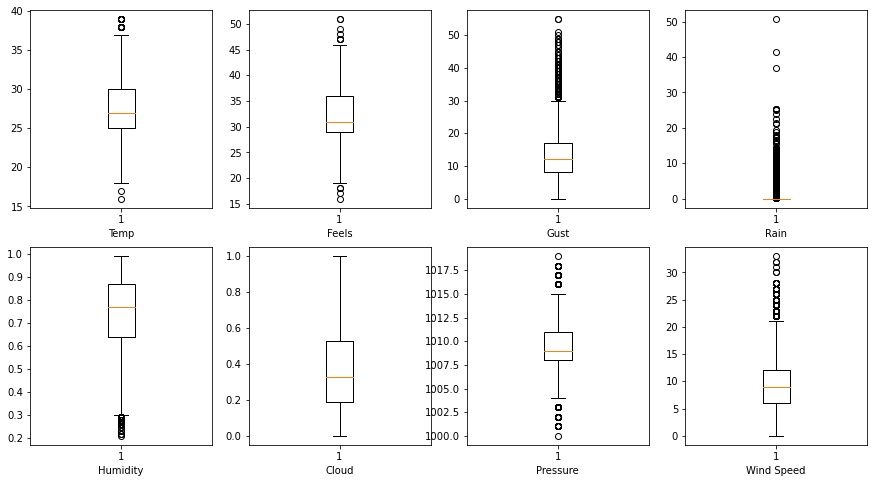

In [47]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))

axs[0, 0].boxplot(data['Temp'])
axs[0, 0].set_xlabel('Temp')

axs[0, 1].boxplot(data['Feels'])
axs[0, 1].set_xlabel('Feels')

axs[0, 2].boxplot(data['Gust'])
axs[0, 2].set_xlabel('Gust')

axs[0, 3].boxplot(data['Rain'])
axs[0, 3].set_xlabel('Rain')

axs[1, 0].boxplot(data['Humidity'])
axs[1, 0].set_xlabel('Humidity')

axs[1, 1].boxplot(data['Cloud'])
axs[1, 1].set_xlabel('Cloud')

axs[1, 2].boxplot(data['Pressure'])
axs[1, 2].set_xlabel('Pressure')

axs[1, 3].boxplot(data['Wind Speed'])
axs[1, 3].set_xlabel('Wind Speed')

plt.show()

**Tìm giá trị không hợp lệ**

Wind Speed sẽ luôn nhỏ hơn Gust trong cùng khoảng thời gian

In [84]:
num_invalid_rows = (data['Gust'] < data['Wind Speed']).sum()
num_invalid_rows

0

-> Không có giá trị không hợp lệ

### Phân bố của dữ liệu không phải số

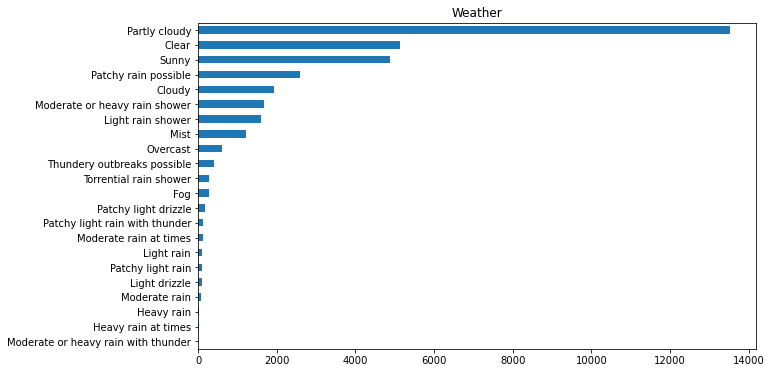

In [48]:
# Weather
dic_weather = {}
for weather in data['Weather'].unique():
    dic_weather[weather] = data[data['Weather'] == weather].shape[0]
    
data_weather = pd.Series(dict(sorted(dic_weather.items(), key=lambda item: item[1])))
plot_weather = data_weather.plot(kind = 'barh', figsize=(10,6), title='Weather')

Gộp các giá trị của **Weather** thành các giá trị: *Sunny*, *Clear*, *Cloudy*, *Rain*, *Mist* và *Overcast*

In [49]:
def convert_weather(x):
    if ('rain' in x) or ('drizzle' in x) or ('Thundery' in x):
        return 'Rain'
    if x == 'Fog':
        return 'Mist'
    if x == 'Partly cloudy':
        return 'Cloudy'
    return x

data['Weather'] = data['Weather'].apply(convert_weather)
data['Weather'].unique()

array(['Mist', 'Rain', 'Cloudy', 'Sunny', 'Clear', 'Overcast'],
      dtype=object)

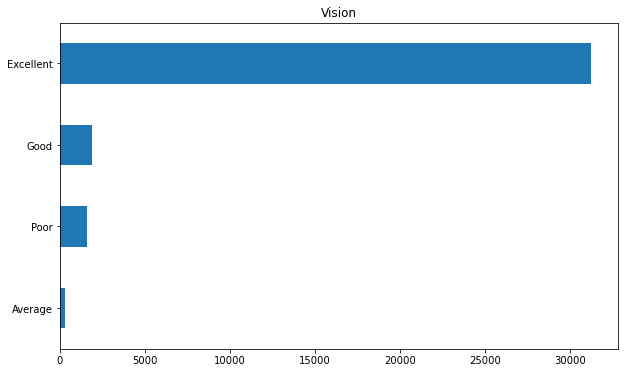

In [50]:
# Vision
dic_vis = {}
for vis in data['Vis'].unique():
    dic_vis[vis] = data[data['Vis'] == vis].shape[0]
data_vis = pd.Series(dict(sorted(dic_vis.items(), key=lambda item: item[1])))
plot_vis = data_vis.plot(kind='barh', figsize=(10,6), title='Vision')

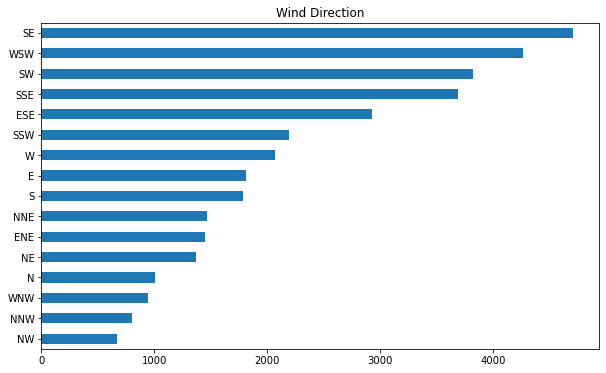

In [51]:
# Wind direction
dic_wind_dir = {}
for wind_dir in data['Wind Direction'].unique():
    dic_wind_dir[wind_dir] = data[data['Wind Direction'] == wind_dir].shape[0]
    
data_wind_dir = pd.Series(dict(sorted(dic_wind_dir.items(), key=lambda item: item[1])))
plot_wind_dir = data_wind_dir.plot(kind='barh', figsize=(10,6), title='Wind Direction')

**Dữ liệu sau khi tiền xử lý**

In [52]:
data.head(10)

,Date,Time,Weather,Temp,Feels,Gust,Rain,Humidity,Cloud,Pressure,Vis,Wind Speed,Wind Direction
0,"Thu 01, Jan 2009",00:00,Mist,23.0,25.0,15.0,0.0,0.97,1.00,1010.0,Poor,9.0,NNW
1,"Thu 01, Jan 2009",03:00,Rain,22.0,25.0,13.0,0.4,0.97,0.84,1010.0,Poor,9.0,NNW
2,"Thu 01, Jan 2009",06:00,Mist,22.0,25.0,8.0,0.0,0.98,1.00,1011.0,Poor,6.0,N
3,"Thu 01, Jan 2009",09:00,Cloudy,27.0,31.0,7.0,0.1,0.83,0.64,1011.0,Excellent,6.0,NNE
4,"Thu 01, Jan 2009",12:00,Cloudy,28.0,34.0,3.0,0.0,0.76,0.62,1010.0,Excellent,3.0,NE
5,"Thu 01, Jan 2009",15:00,Rain,27.0,32.0,4.0,3.1,0.83,0.74,1009.0,Good,2.0,NNE
6,"Thu 01, Jan 2009",18:00,Cloudy,24.0,27.0,14.0,0.0,0.91,0.73,1010.0,Excellent,7.0,NW
7,"Thu 01, Jan 2009",21:00,Rain,23.0,26.0,18.0,1.6,0.91,0.32,1012.0,Excellent,10.0,NNE
8,"Fri 02, Jan 2009",00:00,Cloudy,22.0,22.0,14.0,0.0,0.91,0.30,1011.0,Excellent,8.0,N
9,"Fri 02, Jan 2009",03:00,Cloudy,21.0,22.0,16.0,0.0,0.91,0.72,1010.0,Excellent,9.0,N


**Ghi vào file csv**

In [53]:
data.to_csv('weatherHCM_preprocessed.csv', sep='\t', index=False)

### Đặt câu hỏi

*Tháng nào trong năm có nhiệt độ trung bình cao nhất?*

**Tiền xử lý dữ liệu**

In [54]:
# Tạo cột Month từ cột Date
data['Month'] = data['Date'].str.split(' ', expand=True)[2]
data['Month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

**Phân tích dữ liệu để trả lời câu hỏi**

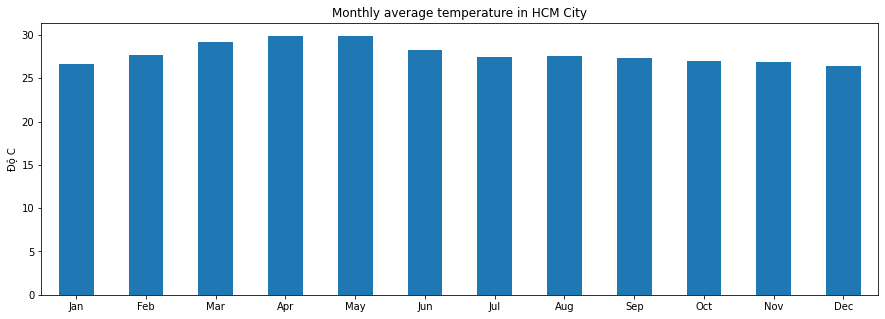

In [55]:
dic = {}

for month in data['Month'].unique():
    dic[month] = data[data['Month'] == month]['Temp'].mean()

mean_temp_of_months = pd.Series(dic)

temp_plot = mean_temp_of_months.plot(kind='bar', figsize=(15, 5), title='Monthly average temperature in HCM City')
temp_plot.set_ylabel('Độ C')
plt.xticks(rotation=0)
plt.show()

-> Nhiệt độ trung bình cao nhất là vào tháng 4 (April). Nhưng nhìn chung nhiệt độ TPHCM phân bố khá đều qua các tháng trong năm.

*Tháng nào trong năm có lượng mưa thấp nhất (khô nhất)?*

**Phân tích dữ liệu để trả lời câu hỏi**

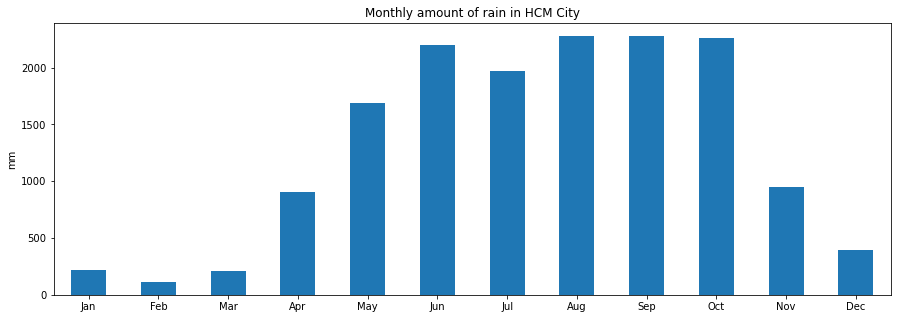

In [56]:
dic = {}

for month in data['Month'].unique():
    dic[month] = data[data['Month'] == month]['Rain'].sum()

rain_of_months = pd.Series(dic)

temp_plot = rain_of_months.plot(kind='bar', figsize=(15, 5), title='Monthly amount of rain in HCM City')
temp_plot.set_ylabel('mm')
plt.xticks(rotation=0)
plt.show()

-> Lượng mưa của tháng 2 (Feb) thấp nhất trong năm